In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Consulto los datos de la acción
data = yf.download("GOOGL", start='2023-09-01')
df = pd.DataFrame(data)
df.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Defino dos decimales para los datos flotantes
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Extraigo los datos de cierre de la acciones para los datos de entrada (data_in) y salida (data_out).
data_in = df[['Close']]
data_out = df[['Close']]

# Los datos de entrada serán los cierres de la acciones desde el primer dato hasta el anteúltimo.
data_in_subset = data_in.iloc[:len(data_in)-1]
# Los datos de salida serán los cierres de las acciones desde el segundo hasta el último.
data_out_subset = data_out.iloc[1:]

# Con esto logro que el primer dato (data_in[0]) sea la entrada del segundo dato (data_out[1])

print(data_in)
print(data_out)
print(data_in_subset)
print(data_out_subset)

    Close
0  135.66
1  135.77
2  134.46
3  135.26
4  136.38
5  136.92
6  135.34
7  136.71
8  138.10
9  137.40
10 138.21
11 138.04
12 133.74
13 130.44
14 130.25
15 131.11
16 128.57
17 130.54
18 132.31
19 130.86
20 134.17
21 132.43
22 135.24
23 135.07
24 137.58
25 138.42
26 138.06
27 140.55
28 138.97
29 137.36
30 139.10
31 139.72
32 137.96
33 137.75
34 135.60
35 136.50
36 138.81
37 125.61
38 122.28
39 122.17
40 124.46
41 124.08
42 126.45
43 127.49
44 129.10
    Close
0  135.66
1  135.77
2  134.46
3  135.26
4  136.38
5  136.92
6  135.34
7  136.71
8  138.10
9  137.40
10 138.21
11 138.04
12 133.74
13 130.44
14 130.25
15 131.11
16 128.57
17 130.54
18 132.31
19 130.86
20 134.17
21 132.43
22 135.24
23 135.07
24 137.58
25 138.42
26 138.06
27 140.55
28 138.97
29 137.36
30 139.10
31 139.72
32 137.96
33 137.75
34 135.60
35 136.50
36 138.81
37 125.61
38 122.28
39 122.17
40 124.46
41 124.08
42 126.45
43 127.49
44 129.10
    Close
0  135.66
1  135.77
2  134.46
3  135.26
4  136.38
5  136.92
6  135.34


In [5]:
from sklearn.model_selection import train_test_split
# Realizamos el split de X e Y en los sets de entrenamiento (train) y test
X_train, X_test, y_train, y_test = train_test_split(data_in_subset, data_out_subset, test_size=0.20, random_state=1992)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Creación del modelo de regreción lineal
model = LinearRegression(fit_intercept=True)
# Entrenamientod el modelo
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Coeficiente del modelo (Sería el parámetro 'a' de la ecuación 'y = ax + b')
model.coef_

array([[0.86041823]])

In [9]:
# Intercepto del modelo (Sería el parámetro 'b' de la ecuación 'y = ax + b')
model.intercept_

array([18.41651261])

In [10]:
len(X_test)

9

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
# Realizamos la predicción con los X_test
y_pred = model.predict(X_test)

# Calculamos el Error Cuadrático Medio
mse = mean_squared_error(y_test, y_pred)

# Calculamos el Coeficiente de Determinación
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 6.163405910824051
R2: 0.419816216991433


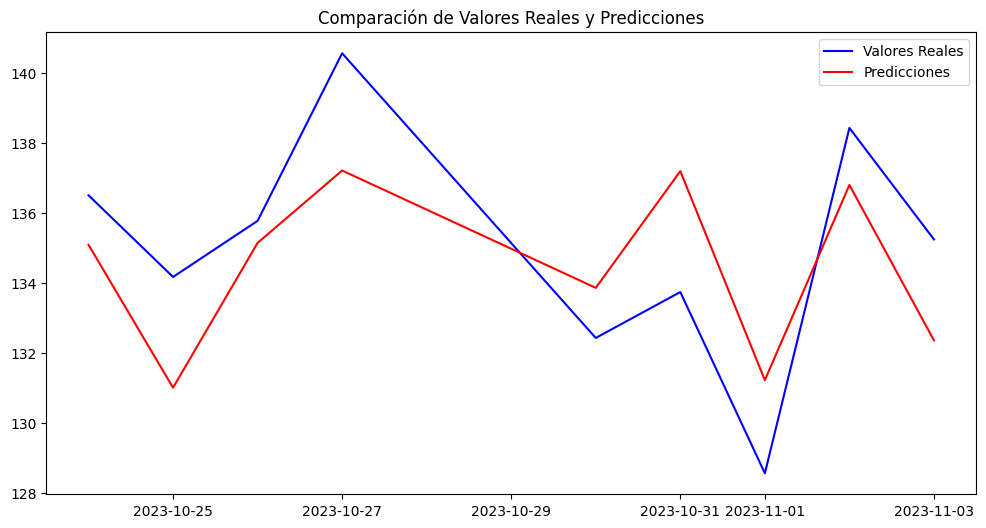

In [12]:
df_subset = df.iloc[-len(y_test):]

# Graficar Valores Reales y Predicciones
plt.figure(figsize=(12,6))
plt.plot(df_subset['Date'], y_test, label='Valores Reales', color='blue')
plt.plot(df_subset['Date'], y_pred, label='Predicciones', color='red')
plt.legend()
plt.title('Comparación de Valores Reales y Predicciones')
plt.show()

In [13]:
len(y_pred)

9

In [14]:
# Crear un DataFrame con los últimos 40 valores reales
cant_dataTest = len(y_pred)
df_test = df.iloc[-cant_dataTest:][['Date', 'Close']].copy()

# Crear un DataFrame para las predicciones
prediction = pd.DataFrame(y_pred, columns=['Predictions'])

# Asignar las predicciones al DataFrame df_test
df_test['Prediction'] = prediction['Predictions'].values

# Reiniciar el índice si es necesario
df_test.reset_index(drop=True, inplace=True)

# Calculo la diferencia entre los datos de cierre y predicciones
df_test['Diference'] = df_test['Close'] - df_test['Prediction']

# Mostrar el DataFrame
print(df_test)
print(f"Media de diferencia entre los datos de cierre y predicciones: {df_test['Diference'].mean()}")

        Date  Close  Prediction  Diference
0 2023-10-24 138.81      135.09       3.72
1 2023-10-25 125.61      131.01      -5.40
2 2023-10-26 122.28      135.14     -12.86
3 2023-10-27 122.17      137.21     -15.04
4 2023-10-30 124.46      133.86      -9.40
5 2023-10-31 124.08      137.19     -13.11
6 2023-11-01 126.45      131.23      -4.78
7 2023-11-02 127.49      136.79      -9.30
8 2023-11-03 129.10      132.36      -3.26
Media de diferencia entre los datos de cierre y predicciones: -7.71385991031832


In [17]:
df_test['Porcentaje'] = df_test['Diference'] * 100 / df_test['Close']
df_test['Porcentaje'] = df_test['Porcentaje'].apply(lambda x: -x if x < 0 else x)

df_test

,Date,Close,Prediction,Diference,Porcentaje
0,2023-10-24,138.81,135.09,3.72,2.68
1,2023-10-25,125.61,131.01,-5.40,4.30
2,2023-10-26,122.28,135.14,-12.86,10.52
3,2023-10-27,122.17,137.21,-15.04,12.31
4,2023-10-30,124.46,133.86,-9.40,7.55
5,2023-10-31,124.08,137.19,-13.11,10.56
6,2023-11-01,126.45,131.23,-4.78,3.78
7,2023-11-02,127.49,136.79,-9.30,7.30
8,2023-11-03,129.10,132.36,-3.26,2.53
